In [2]:
import numpy as np
import csv

# to add files
from google.colab import files

# the object "uploaded_dict" is a dictionary of all files uploaded, keyed by filename
uploaded_dict = files.upload()

for fn in uploaded_dict.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded_dict[fn])))
  

Saving UAData.csv to UAData.csv
User uploaded file "UAData.csv" with length 12078 bytes


In [4]:
for key, val in uploaded_dict.items():
  print(key)
  print(val)

f = open('UAData.csv', "rt", encoding='ascii')


  


UAData.csv
b'32.2337934,-110.9547958,3\r\n32.2590825,-110.9720084,3\r\n32.2303972,-110.9567222,3\r\n32.2290578,-110.9594937,3\r\n32.2396061,-110.9497596,3\r\n32.323278,-110.980958,6\r\n32.2326679,-110.954738,3\r\n32.2278581,-110.9437983,6\r\n32.2335467,-110.9466309,3\r\n32.2338271,-110.9523318,3\r\n32.2348496,-110.9494037,3\r\n32.2515301,-110.9291951,6\r\n32.2316597,-110.9625473,6\r\n32.2300582,-110.9532406,3\r\n32.2290737,-110.9594785,3\r\n32.2290578,-110.9594785,3\r\n32.234568,-110.9478472,3\r\n32.2286339,-110.9529183,6\r\n32.2304092,-110.9594033,3\r\n32.234878,-110.9452476,6\r\n32.2253929,-110.8560285,6\r\n32.227765,-110.9579086,6\r\n32.2303718,-110.9578983,1\r\n32.2543178,-110.8752961,6\r\n32.2317166,-110.9488632,3\r\n32.2337718,-110.9494026,3\r\n32.2290578,-110.9594785,3\r\n32.234865,-110.9458568,6\r\n32.234878,-110.9452476,3\r\n32.2316756,-110.9625475,3\r\n32.2348654,-110.9494168,3\r\n32.2277491,-110.9578955,3\r\n32.2277878,-110.9510106,3\r\n32.2359419,-110.9567609,3\r\n32.234874

In [5]:
col_index_max = 51
row_index_max = 27
grid = np.zeros((row_index_max,col_index_max))
list = [['31.65', '-109.62', '3'],['31.23', '-109.62', '4'],['31.76', '-109.22', '2'],['32', '-110', '1']]

corner_lat = 32.236
corner_long = -110.9595
resolution_lat = .0003
resolution_long = .0003


csv_reader = csv.reader(f, delimiter=',')

print(csv_reader)

for row in csv_reader:
  r = np.int_(np.round(np.absolute((np.float32(row[0]) - corner_lat) / resolution_lat)))
  c = np.int_(np.round(np.absolute((np.float32(row[1]) - corner_long) / resolution_long)))
  # check for r and c greater than = 0 and less than = max index - 1
  # below adds the weight in a plus shape directly around the rounded 
  if r >= 0 and r < row_index_max and c >= 0 and c < col_index_max:
    grid[r,c] += np.float32(row[2])
    
    # points up down left right of crime spot
    r += 1
    if r >= 0 and r < row_index_max:
      grid[r,c] += np.float32(row[2]) / 1.5
    r -= 1
    c += 1
    if c >= 0 and c < col_index_max:
      grid[r,c] += np.float32(row[2]) / 1.5
    c -= 1
    r -=1
    if r >= 0 and r < row_index_max:
      grid[r,c] += np.float32(row[2]) / 1.5
    r += 1
    c -= 1
    if c >= 0 and c < col_index_max:
      grid[r,c] += np.float32(row[2]) / 1.5
    # points diag
    r += 1
    if r >= 0 and r < row_index_max and c >= 0 and c < col_index_max:
      grid[r,c] += np.float32(row[2]) / 2
    c += 2
    if r >= 0 and r < row_index_max and c >= 0 and c < col_index_max:
      grid[r,c] += np.float32(row[2]) / 2
    r -= 2
    if r >= 0 and r < row_index_max and c >= 0 and c < col_index_max:
      grid[r,c] += np.float32(row[2]) / 2
    c -= 2
    if r >= 0 and r < row_index_max and c >= 0 and c < col_index_max:
      grid[r,c] += np.float32(row[2]) / 2
    
print(grid)


[[ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.   0.   0.  ...  0.   0.   0. ]
 ...
 [42.  31.5 42.5 ...  0.   0.   0. ]
 [ 0.   0.  28.5 ...  0.   0.   0. ]
 [ 0.   0.   0.  ...  0.   0.   0. ]]


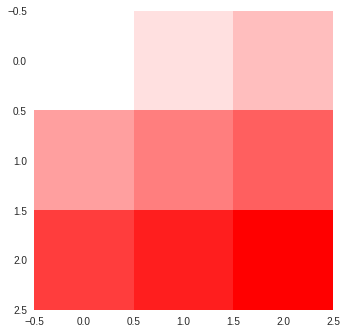

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


colors = [(1, 1, 1), (1, 0, 0)]  
cmap_name = 'n'
cm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=100)


d = [[1, 2, 3],[4, 5, 6],[7, 8, 9]]
ax = plt.gca()
ax.grid(False)
im = ax.imshow(d, cmap=cm)




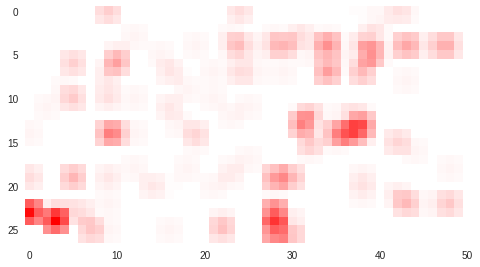

In [9]:
import matplotlib.pyplot as plt

d = [[1, 2, 3],[4, 5, 6],[7, 8, 9]]
ax = plt.gca()
im = ax.imshow(grid, cmap = cm)

ax.grid(False)

plt.savefig("heatmap.png", dpi=500, quality = 95, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
files.download("heatmap.png")

In [14]:
import json

d = []

for i in range(len(grid)):
  for j in range(len(grid[0])):
    d += [[corner_lat - i*resolution_lat, corner_long - j*resolution_long, grid[i][j]]]

print(d)    

with open("uadata.json", "w") as outfile:
    json.dump({"data": d}, outfile, indent = 4)
    
files.download("uadata.json")

[[32.236, -110.9595, 0.0], [32.236, -110.9598, 0.0], [32.236, -110.96010000000001, 0.0], [32.236, -110.9604, 0.0], [32.236, -110.9607, 0.0], [32.236, -110.961, 0.0], [32.236, -110.96130000000001, 0.0], [32.236, -110.9616, 0.0], [32.236, -110.9619, 8.666666666666666], [32.236, -110.96220000000001, 13.0], [32.236, -110.9625, 8.666666666666666], [32.236, -110.9628, 0.0], [32.236, -110.96310000000001, 0.0], [32.236, -110.96340000000001, 0.0], [32.236, -110.9637, 0.0], [32.236, -110.964, 0.0], [32.236, -110.96430000000001, 0.0], [32.236, -110.9646, 0.0], [32.236, -110.9649, 0.0], [32.236, -110.96520000000001, 0.0], [32.236, -110.9655, 0.0], [32.236, -110.9658, 0.0], [32.236, -110.96610000000001, 0.0], [32.236, -110.96640000000001, 6.0], [32.236, -110.9667, 9.0], [32.236, -110.967, 6.0], [32.236, -110.96730000000001, 0.0], [32.236, -110.9676, 0.0], [32.236, -110.9679, 0.0], [32.236, -110.96820000000001, 0.0], [32.236, -110.9685, 0.0], [32.236, -110.9688, 0.0], [32.236, -110.96910000000001, 0